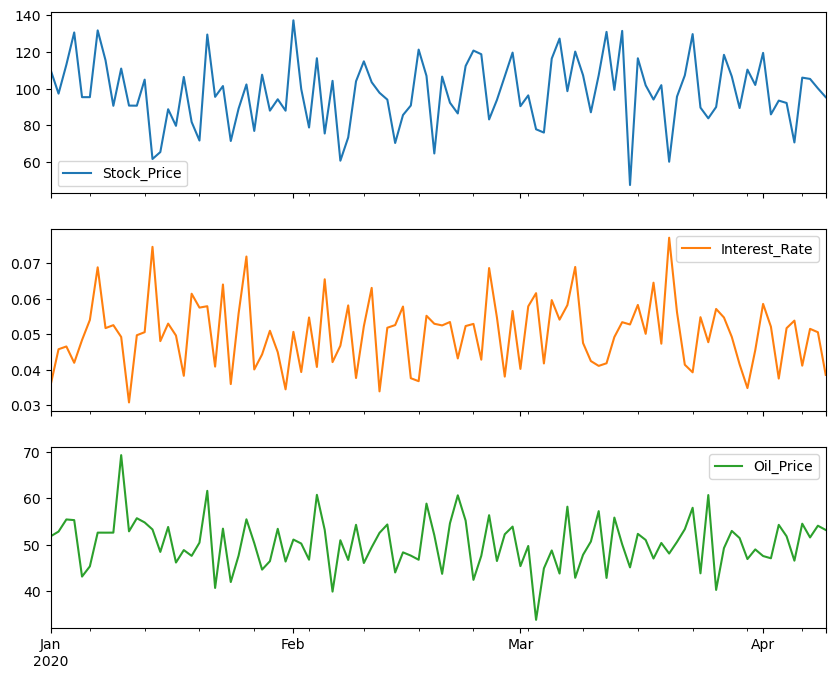

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo dữ liệu giả lập
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
stock_price = np.random.randn(100) * 20 + 100
interest_rate = np.random.randn(100) * 0.01 + 0.05
oil_price = np.random.randn(100) * 5 + 50

df = pd.DataFrame({
    'Stock_Price': stock_price,
    'Interest_Rate': interest_rate,
    'Oil_Price': oil_price
}, index=dates)

# Plot dữ liệu
df.plot(subplots=True, figsize=(10, 8))
plt.show()

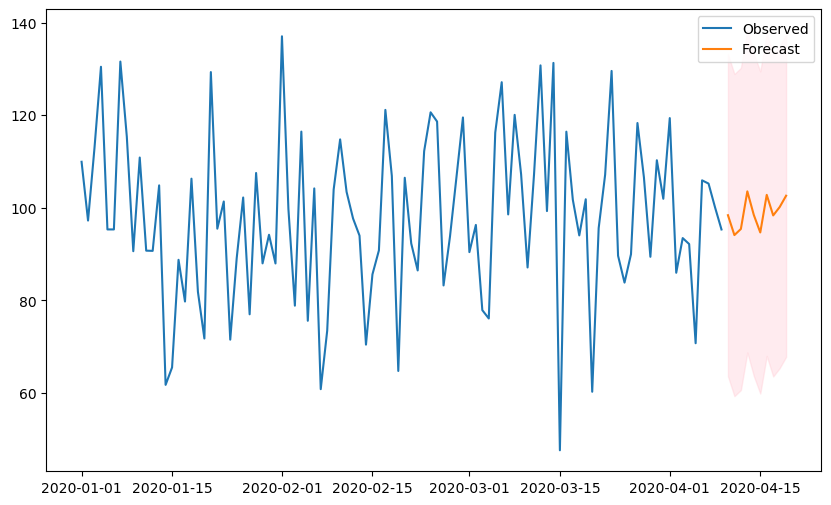

In [16]:
# Xác định biến đầu vào và biến đầu ra
y = df['Stock_Price']
exog = df[['Interest_Rate', 'Oil_Price']]

# Fit mô hình ARIMAX
arimax_model = SARIMAX(y, exog=exog, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
arimax_result = arimax_model.fit(disp=False)

# Dự báo
forecast = arimax_result.get_forecast(steps=10, exog=exog.iloc[-10:])
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot kết quả
plt.figure(figsize=(10, 6))
plt.plot(y, label='Observed')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_mean.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

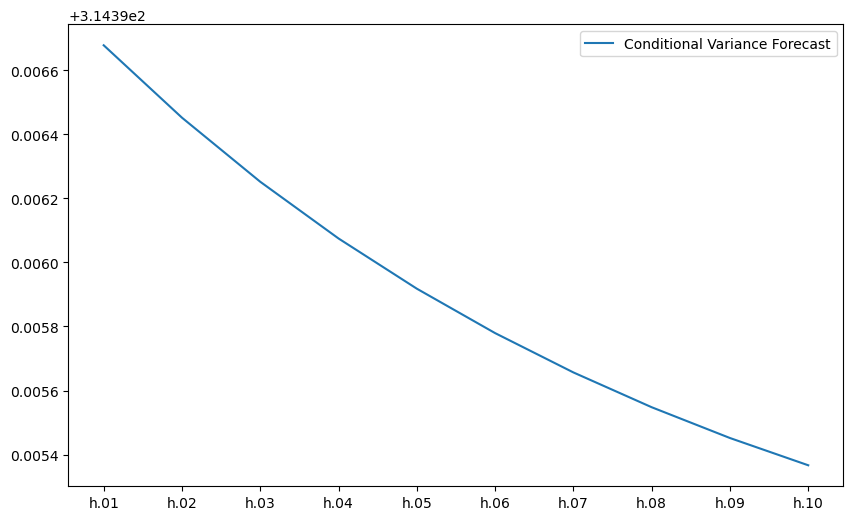

In [17]:
from arch import arch_model
# Lấy sai số (residuals) từ mô hình ARIMAX
residuals = arimax_result.resid

# Fit mô hình GARCH
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Dự báo phương sai có điều kiện
garch_forecast = garch_result.forecast(horizon=10)
cond_vol = garch_forecast.variance.iloc[-1:]

# Plot kết quả
plt.figure(figsize=(10, 6))
plt.plot(cond_vol.T, label='Conditional Variance Forecast')
plt.legend()
plt.show()

In [18]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


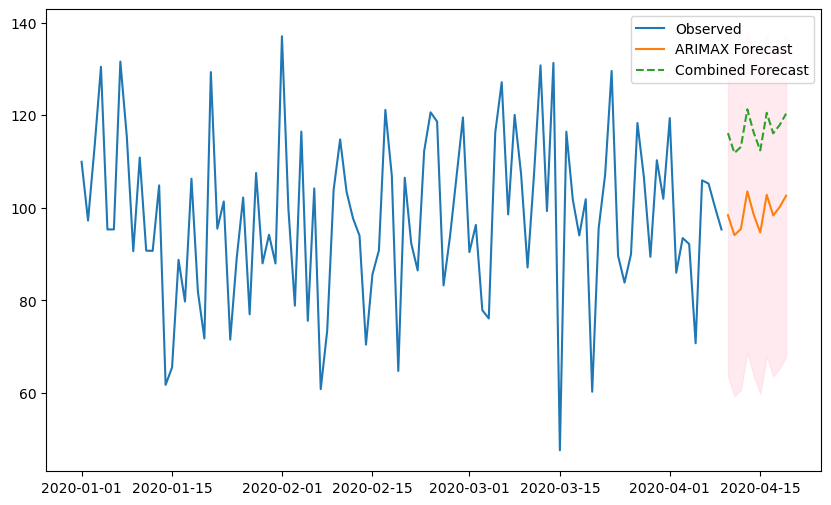

In [19]:
# Dự báo kết hợp
combined_forecast = forecast_mean + np.sqrt(cond_vol.values.flatten())

# Plot kết quả
plt.figure(figsize=(10, 6))
plt.plot(y, label='Observed')
plt.plot(forecast_mean, label='ARIMAX Forecast')
plt.plot(combined_forecast, label='Combined Forecast', linestyle='--')
plt.fill_between(forecast_mean.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [20]:
pip istall arch_model

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "istall" - maybe you meant "install"

